# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report

plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.dpi'] = 300

# Article Topic and Subtopic

In [7]:
df = pd.read_csv('../annotations/articles/article_topic_annotation_output.csv')

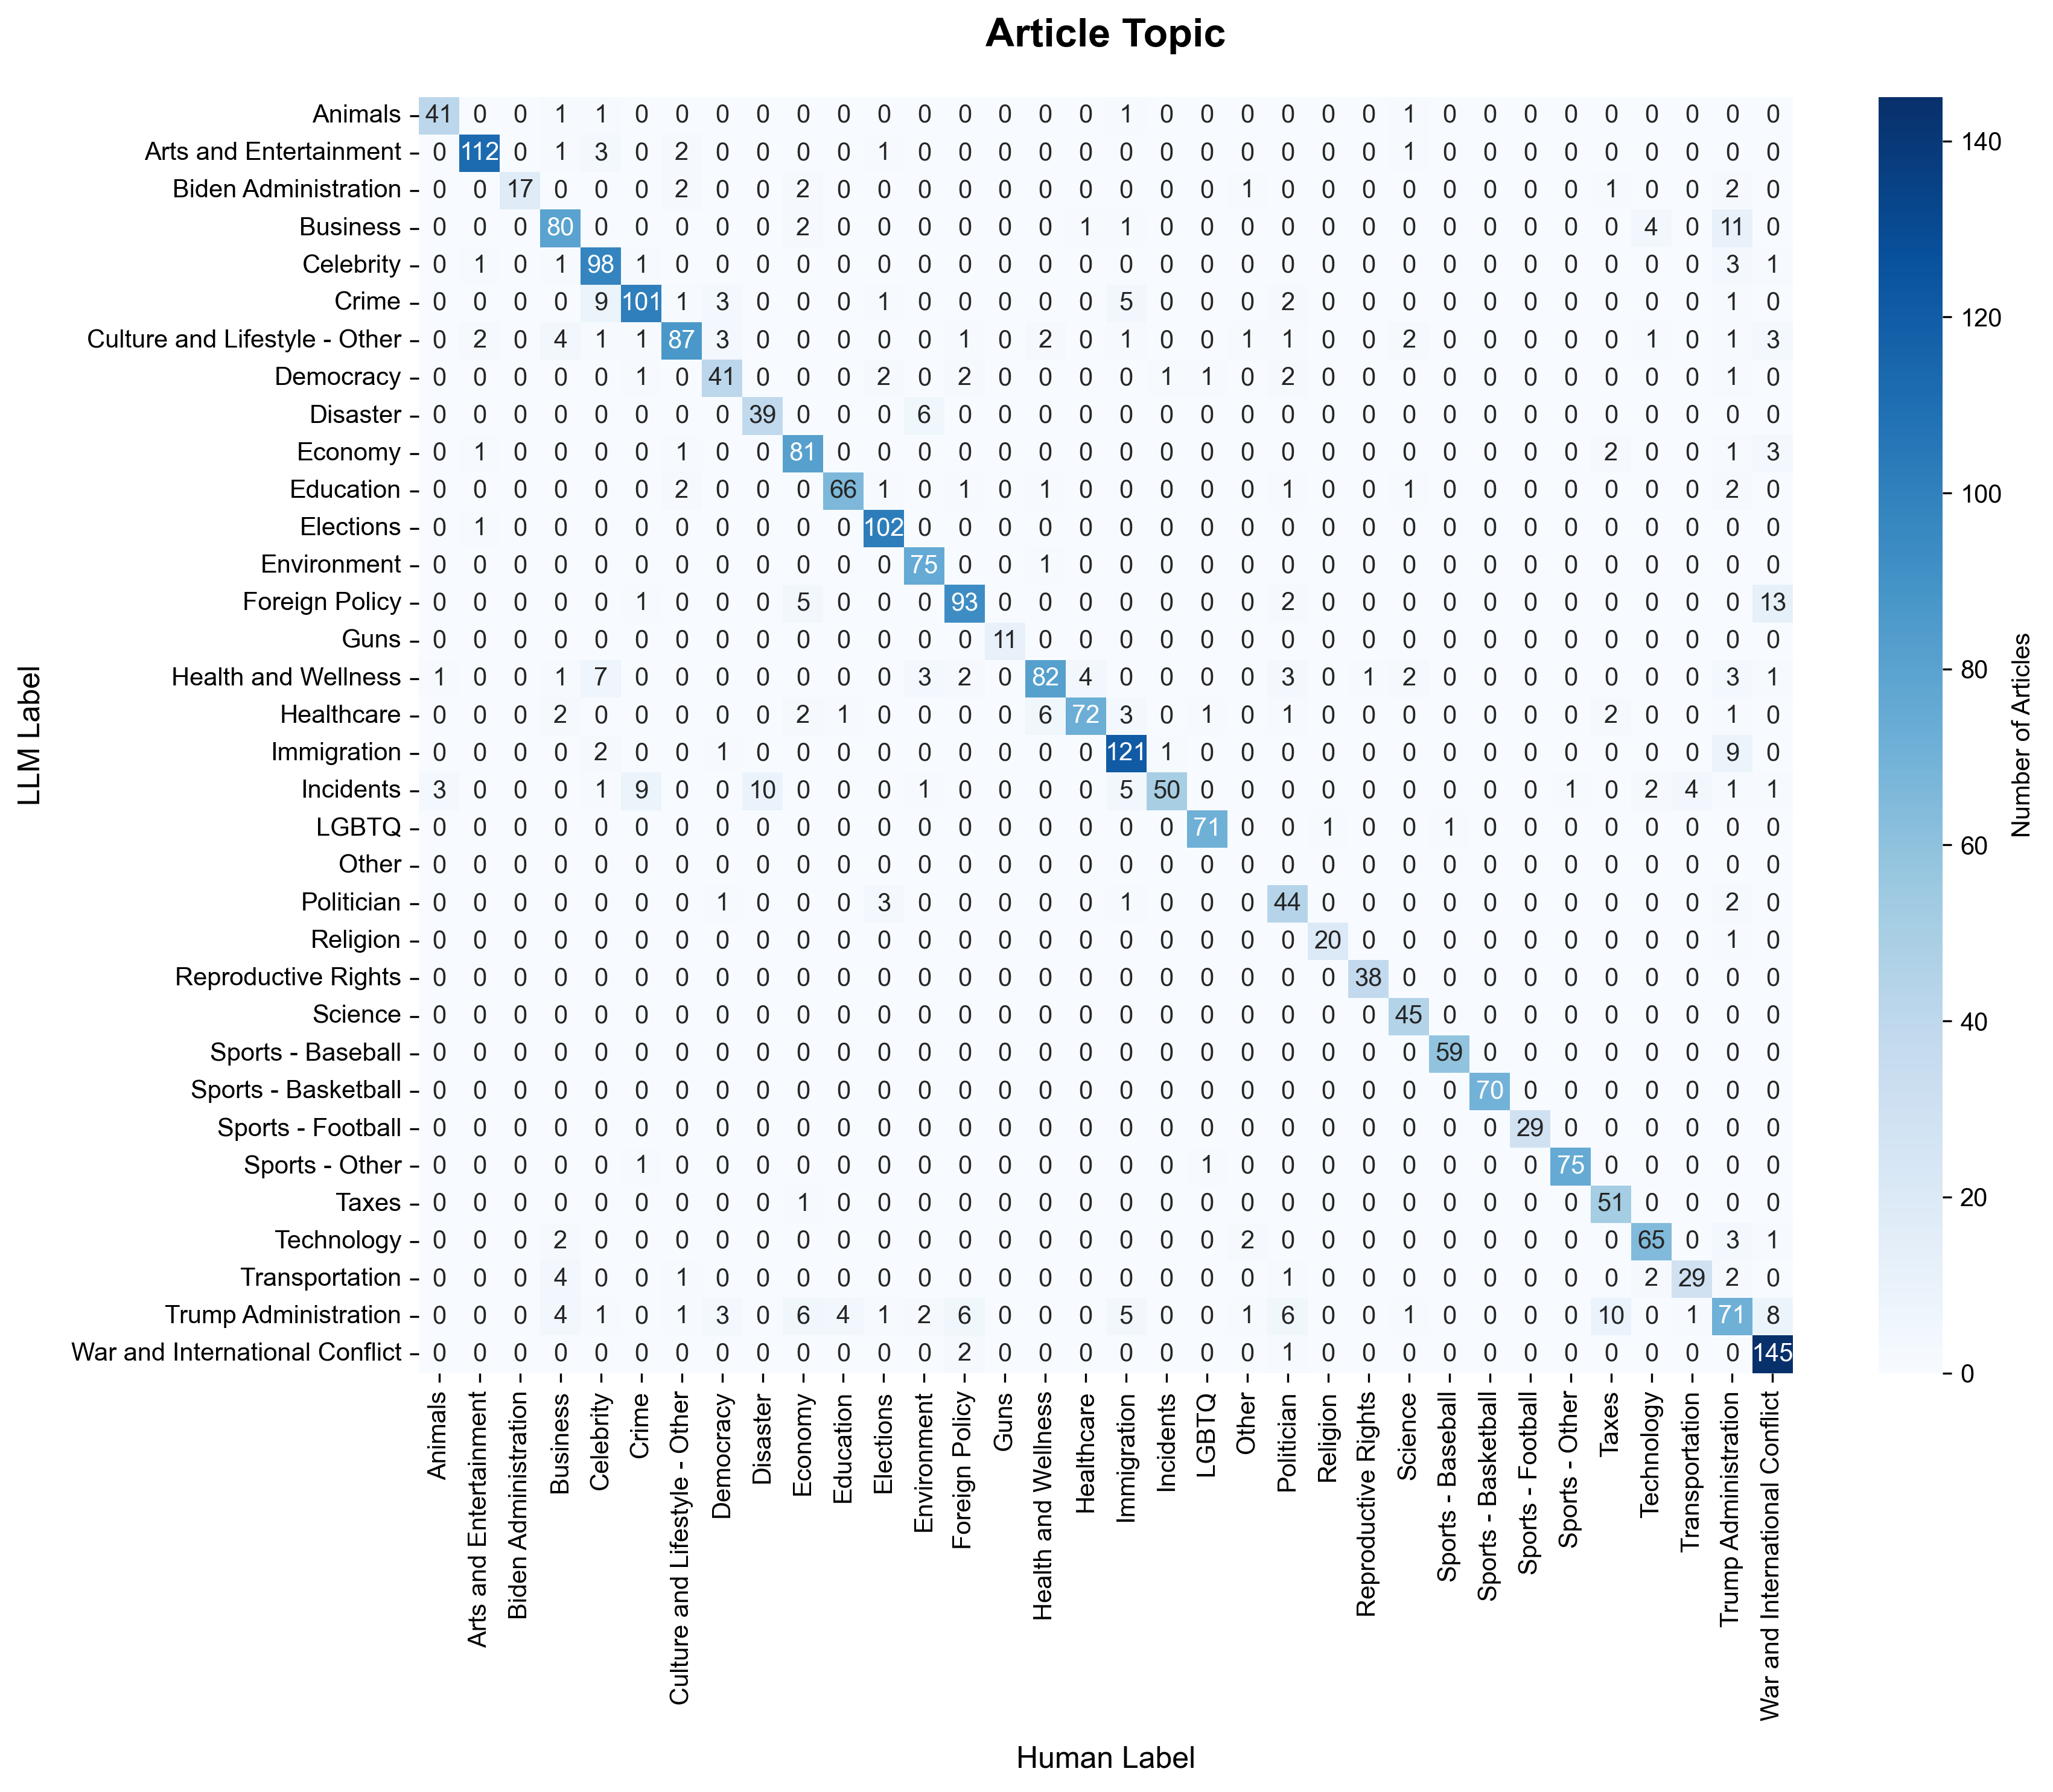

                                precision  recall  f1-score   support
Animals                             0.911   0.911     0.911    45.000
Arts and Entertainment              0.933   0.957     0.945   117.000
Biden Administration                0.680   1.000     0.810    17.000
Business                            0.808   0.800     0.804   100.000
Celebrity                           0.933   0.797     0.860   123.000
Crime                               0.821   0.878     0.849   115.000
Culture and Lifestyle - Other       0.784   0.897     0.837    97.000
Democracy                           0.804   0.788     0.796    52.000
Disaster                            0.867   0.796     0.830    49.000
Economy                             0.910   0.818     0.862    99.000
Education                           0.880   0.930     0.904    71.000
Elections                           0.990   0.919     0.953   111.000
Environment                         0.987   0.862     0.920    87.000
Foreign Policy      

/Users/samarh/opt/anaconda3/envs/methods_paper/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/samarh/opt/anaconda3/envs/methods_paper/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/samarh/opt/anaconda3/envs/methods_paper/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [6]:
def get_true_labels(df):
    true_topics = []
    for idx, row in df.iterrows():
        gpt_topic = row['gpt_topic']
        
        if pd.notna(row['suggested_topic']) and row['suggested_topic'] != gpt_topic:
            true_topics.append(row['suggested_topic'])
        elif pd.notna(row['suggested_topic_text']) and row['suggested_topic_text'] != gpt_topic:
            true_topics.append(row['suggested_topic_text'])
        else:
            true_topics.append(gpt_topic)
    
    return true_topics

df['true_topic'] = get_true_labels(df)
predicted_topics = df['gpt_topic'].tolist()
true_topics = df['true_topic'].tolist()

cm = confusion_matrix(predicted_topics, true_topics)

all_topics = sorted(list(set(true_topics + predicted_topics)))

cm_df = pd.DataFrame(cm, index=all_topics, columns=all_topics) 

plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Articles'})

plt.title('Article Topic', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Human Label', fontsize=12, labelpad=10) 
plt.ylabel('LLM Label', fontsize=12, labelpad=10)
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('../plots/topic_confusion_matrix.pdf', bbox_inches='tight')

plt.show()

report = classification_report(true_topics, predicted_topics, 
                             target_names=all_topics, 
                             output_dict=True)

report_df = pd.DataFrame(report).transpose()
print(report_df.round(3))

total_articles = len(df)
correct_predictions = (np.array(predicted_topics) == np.array(true_topics)).sum()
overall_accuracy = correct_predictions / total_articles

print(f"Accuracy: {correct_predictions}/{total_articles} ({overall_accuracy:.3f})")

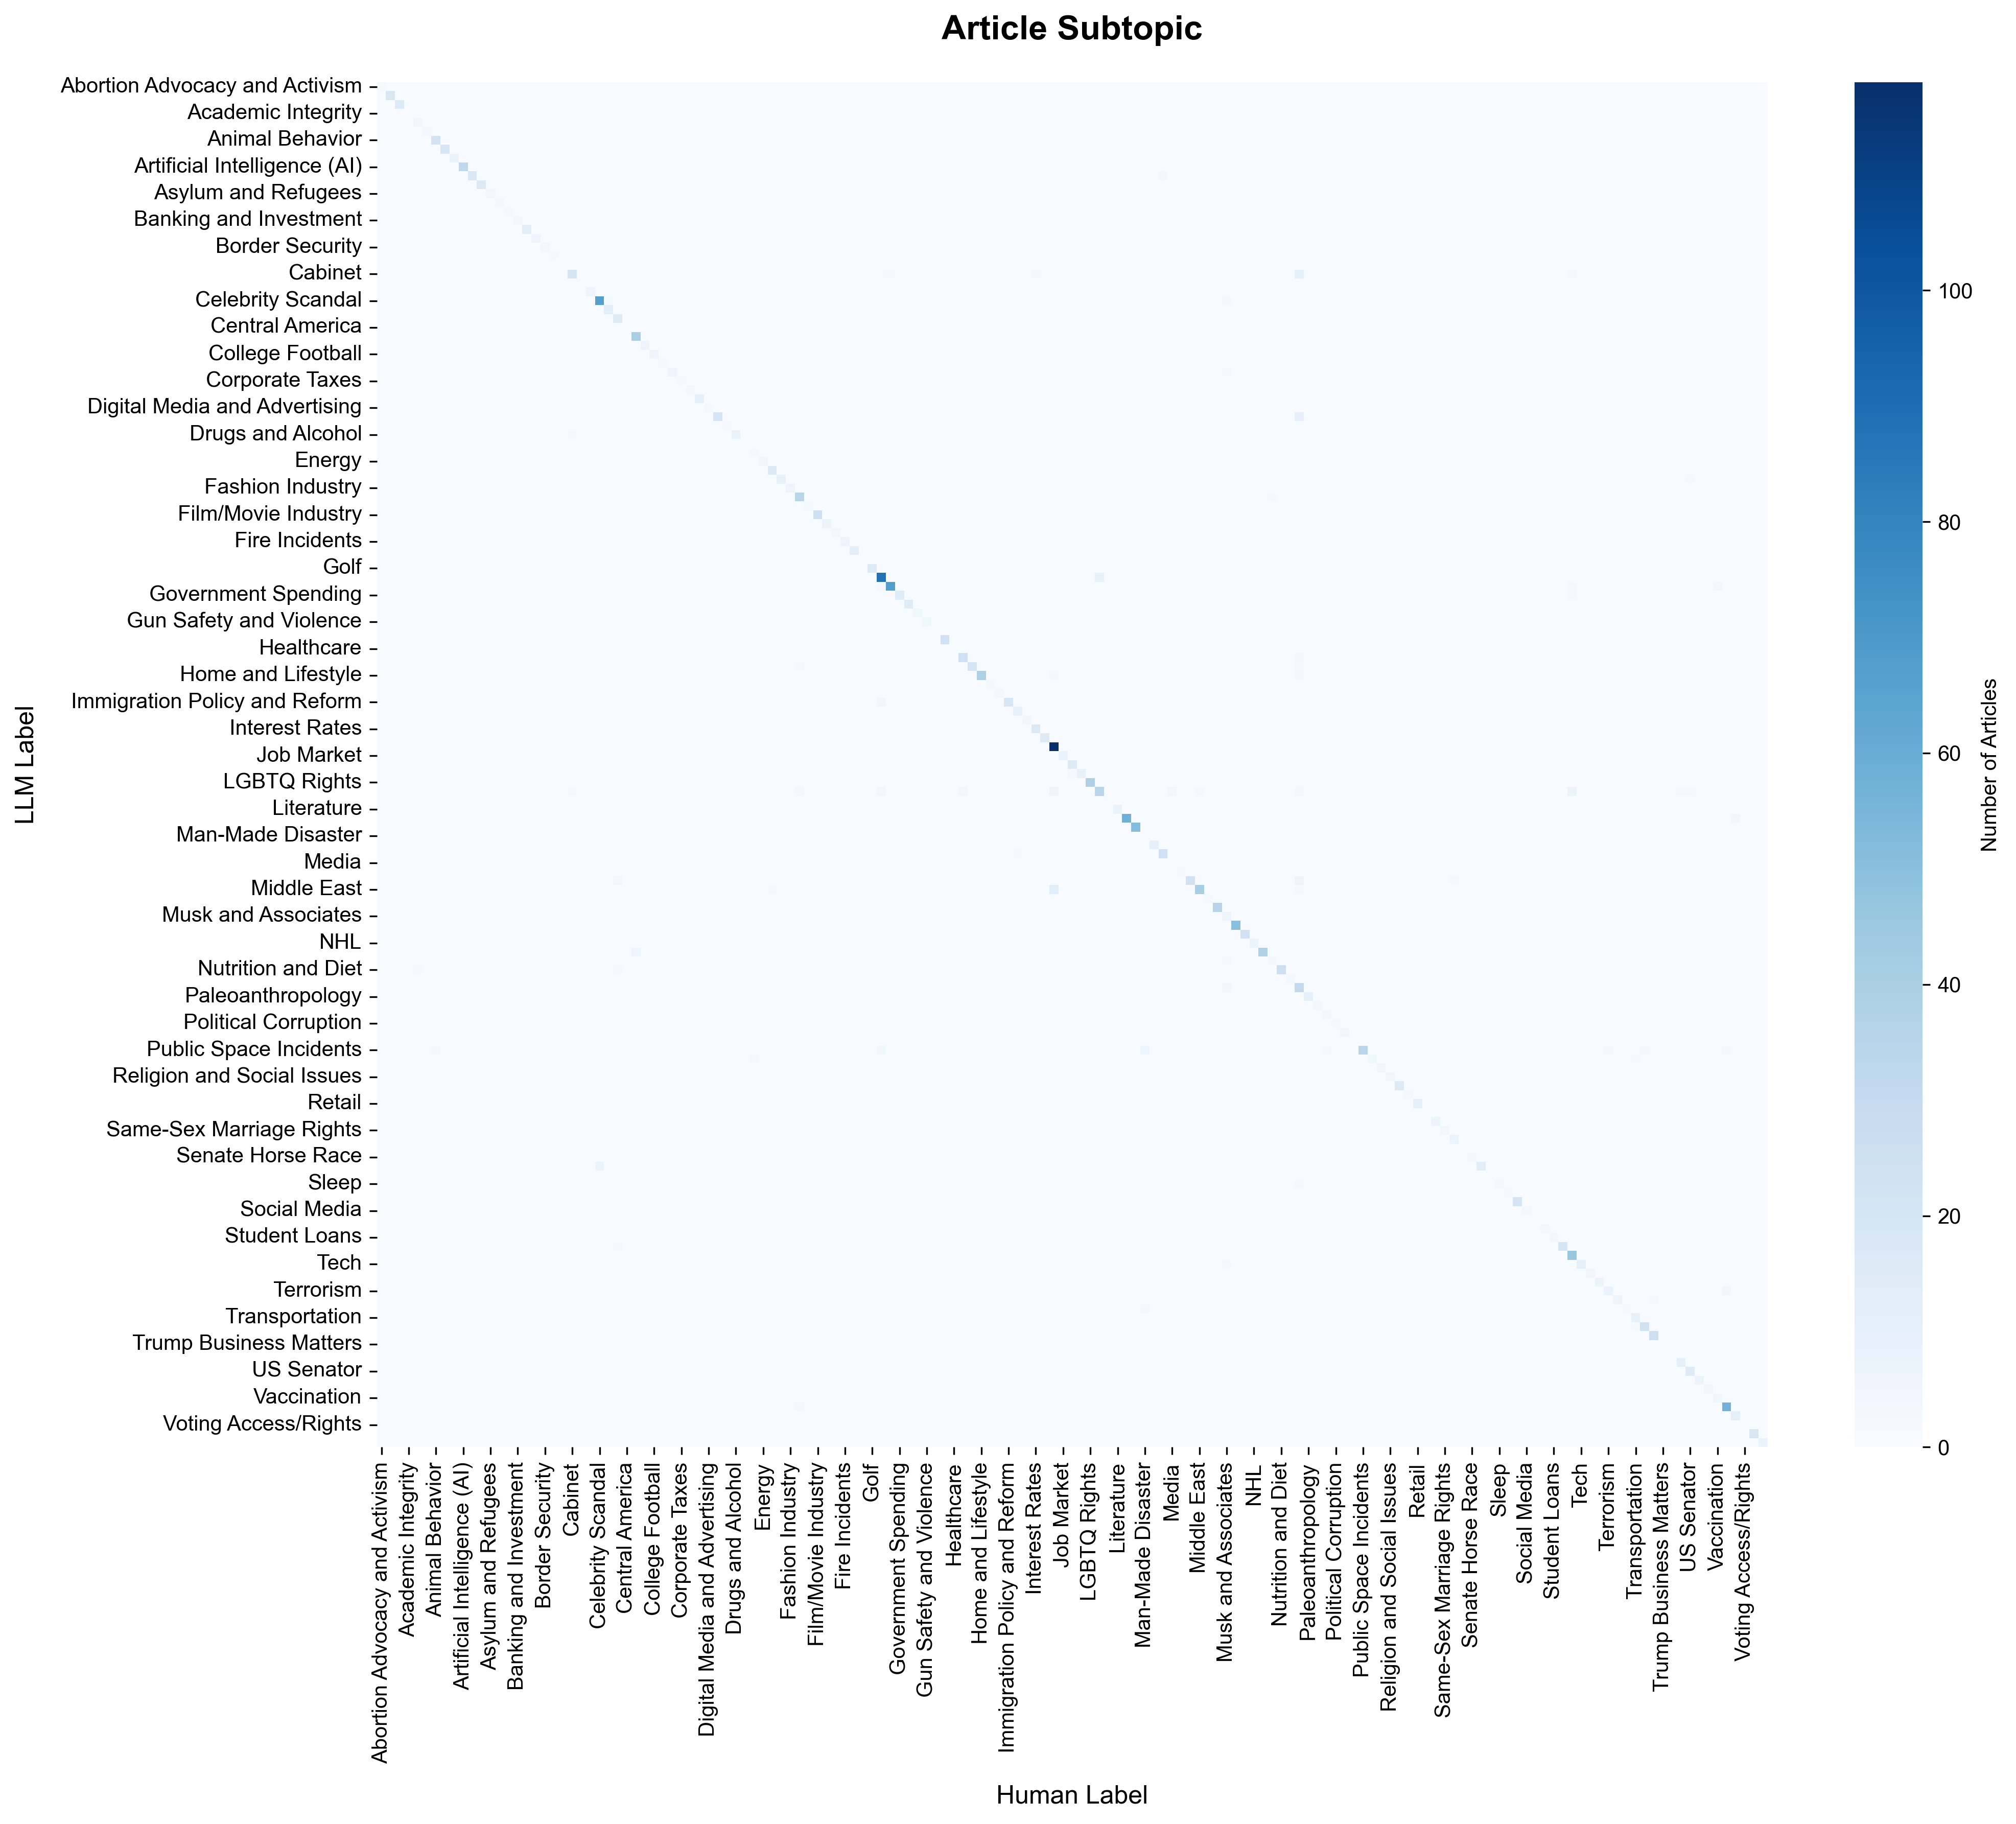

                                precision  recall  f1-score   support
Abortion Advocacy and Activism      1.000   1.000     1.000     2.000
Abortion Regulation                 1.000   1.000     1.000    18.000
Abortion and Politics               1.000   1.000     1.000    16.000
Academic Integrity                  1.000   1.000     1.000     1.000
Africa                              0.714   0.714     0.714     7.000
...                                   ...     ...       ...       ...
WNBA                                1.000   1.000     1.000    18.000
Wildlife Conservation               1.000   1.000     1.000     8.000
accuracy                            0.831   0.831     0.831     0.831
macro avg                           0.812   0.832     0.801  2521.000
weighted avg                        0.860   0.831     0.830  2521.000

[156 rows x 4 columns]
Accuracy: 2096/2521 (0.831)


/Users/samarh/opt/anaconda3/envs/methods_paper/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/samarh/opt/anaconda3/envs/methods_paper/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/samarh/opt/anaconda3/envs/methods_paper/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [5]:
def get_true_subtopic_labels(df):
    true_subtopics = []
    for idx, row in df.iterrows():
        gpt_subtopic = row['gpt_subtopic']
        
        if pd.notna(row['suggested_subtopic']) and row['suggested_subtopic'] != gpt_subtopic:
            true_subtopics.append(row['suggested_subtopic'])
        elif pd.notna(row['suggested_subtopic_text']) and row['suggested_subtopic_text'] != gpt_subtopic:
            true_subtopics.append(row['suggested_subtopic_text'])
        else:
            true_subtopics.append(gpt_subtopic)
    
    return true_subtopics

df['true_subtopic'] = get_true_subtopic_labels(df)
predicted_subtopics = df['gpt_subtopic'].tolist()
true_subtopics = df['true_subtopic'].tolist()

cm = confusion_matrix(predicted_subtopics, true_subtopics)

all_subtopics = sorted(list(set(true_subtopics + predicted_subtopics)))

cm_df = pd.DataFrame(cm, index=all_subtopics, columns=all_subtopics) 

plt.figure(figsize=(14, 12))
sns.heatmap(cm_df, annot=False, cmap='Blues', cbar_kws={'label': 'Number of Articles'})

plt.title('Article Subtopic', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Human Label', fontsize=12, labelpad=10) 
plt.ylabel('LLM Label', fontsize=12, labelpad=10)
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('../plots/subtopic_confusion_matrix.pdf', bbox_inches='tight')

plt.show()

report = classification_report(true_subtopics, predicted_subtopics, 
                             target_names=all_subtopics, 
                             output_dict=True)

report_df = pd.DataFrame(report).transpose()
print(report_df.round(3))

total_articles = len(df)
correct_predictions = (np.array(predicted_subtopics) == np.array(true_subtopics)).sum()
overall_accuracy = correct_predictions / total_articles

print(f"Accuracy: {correct_predictions}/{total_articles} ({overall_accuracy:.3f})")

# Article Lean, Tone, Type

In [2]:
df1 = pd.read_csv('../annotations/articles/article_annotation_output_1.csv')
df2 = pd.read_csv('../annotations/articles/article_annotation_output_2.csv')
df3 = pd.read_csv('../annotations/articles/article_annotation_output_3.csv') 

In [3]:
def get_proportions(df, column):
    return df[column].value_counts(normalize=True)

lean_props_df1 = get_proportions(df1, 'lean_analysis_accuracy')
lean_props_df2 = get_proportions(df2, 'lean_analysis_accuracy')
lean_props_df3 = get_proportions(df3, 'lean_analysis_accuracy')

lean_props = pd.concat([lean_props_df1, lean_props_df2, lean_props_df3], axis=1)
lean_props.columns = ['df1', 'df2', 'df3']
lean_props = lean_props.fillna(0)
lean_props['mean'] = lean_props.mean(axis=1)
lean_props['std'] = lean_props.std(axis=1)
lean_stats = lean_props[['mean', 'std']].sort_values(by='mean', ascending=False)

tone_props_df1 = get_proportions(df1, 'tone_analysis_accuracy')
tone_props_df2 = get_proportions(df2, 'tone_analysis_accuracy')
tone_props_df3 = get_proportions(df3, 'tone_analysis_accuracy')

tone_props = pd.concat([tone_props_df1, tone_props_df2, tone_props_df3], axis=1)
tone_props.columns = ['df1', 'df2', 'df3']
tone_props = tone_props.fillna(0)
tone_props['mean'] = tone_props.mean(axis=1)
tone_props['std'] = tone_props.std(axis=1)
tone_stats = tone_props[['mean', 'std']].sort_values(by='mean', ascending=False)

news_type_props_df1 = get_proportions(df1, 'gpt_news_type_agreement')
news_type_props_df2 = get_proportions(df2, 'gpt_news_type_agreement')
news_type_props_df3 = get_proportions(df3, 'gpt_news_type_agreement')

news_type_props = pd.concat([news_type_props_df1, news_type_props_df2, news_type_props_df3], axis=1)
news_type_props.columns = ['df1', 'df2', 'df3']
news_type_props = news_type_props.fillna(0)
news_type_props['mean'] = news_type_props.mean(axis=1)
news_type_props['std'] = news_type_props.std(axis=1)
news_type_stats = news_type_props[['mean', 'std']].sort_values(by='mean', ascending=False)

print("Article Lean:\n", lean_stats.round(3))
print("\nArticle Tone:\n", tone_stats.round(3))
print("\nArticle Type:\n", news_type_stats.round(3))

Article Lean:
                              mean    std
lean_analysis_accuracy                  
Agree                       0.733  0.009
Somewhat Agree              0.127  0.062
Somewhat Disagree           0.060  0.059
Disagree                    0.047  0.038
Neither Agree nor Disagree  0.033  0.025

Article Tone:
                              mean    std
tone_analysis_accuracy                  
Agree                       0.780  0.059
Somewhat Agree              0.153  0.084
Somewhat Disagree           0.047  0.041
Neither Agree nor Disagree  0.020  0.016

Article Type:
                           mean    std
gpt_news_type_agreement              
Agree                    0.907  0.074
Disagree                 0.093  0.074


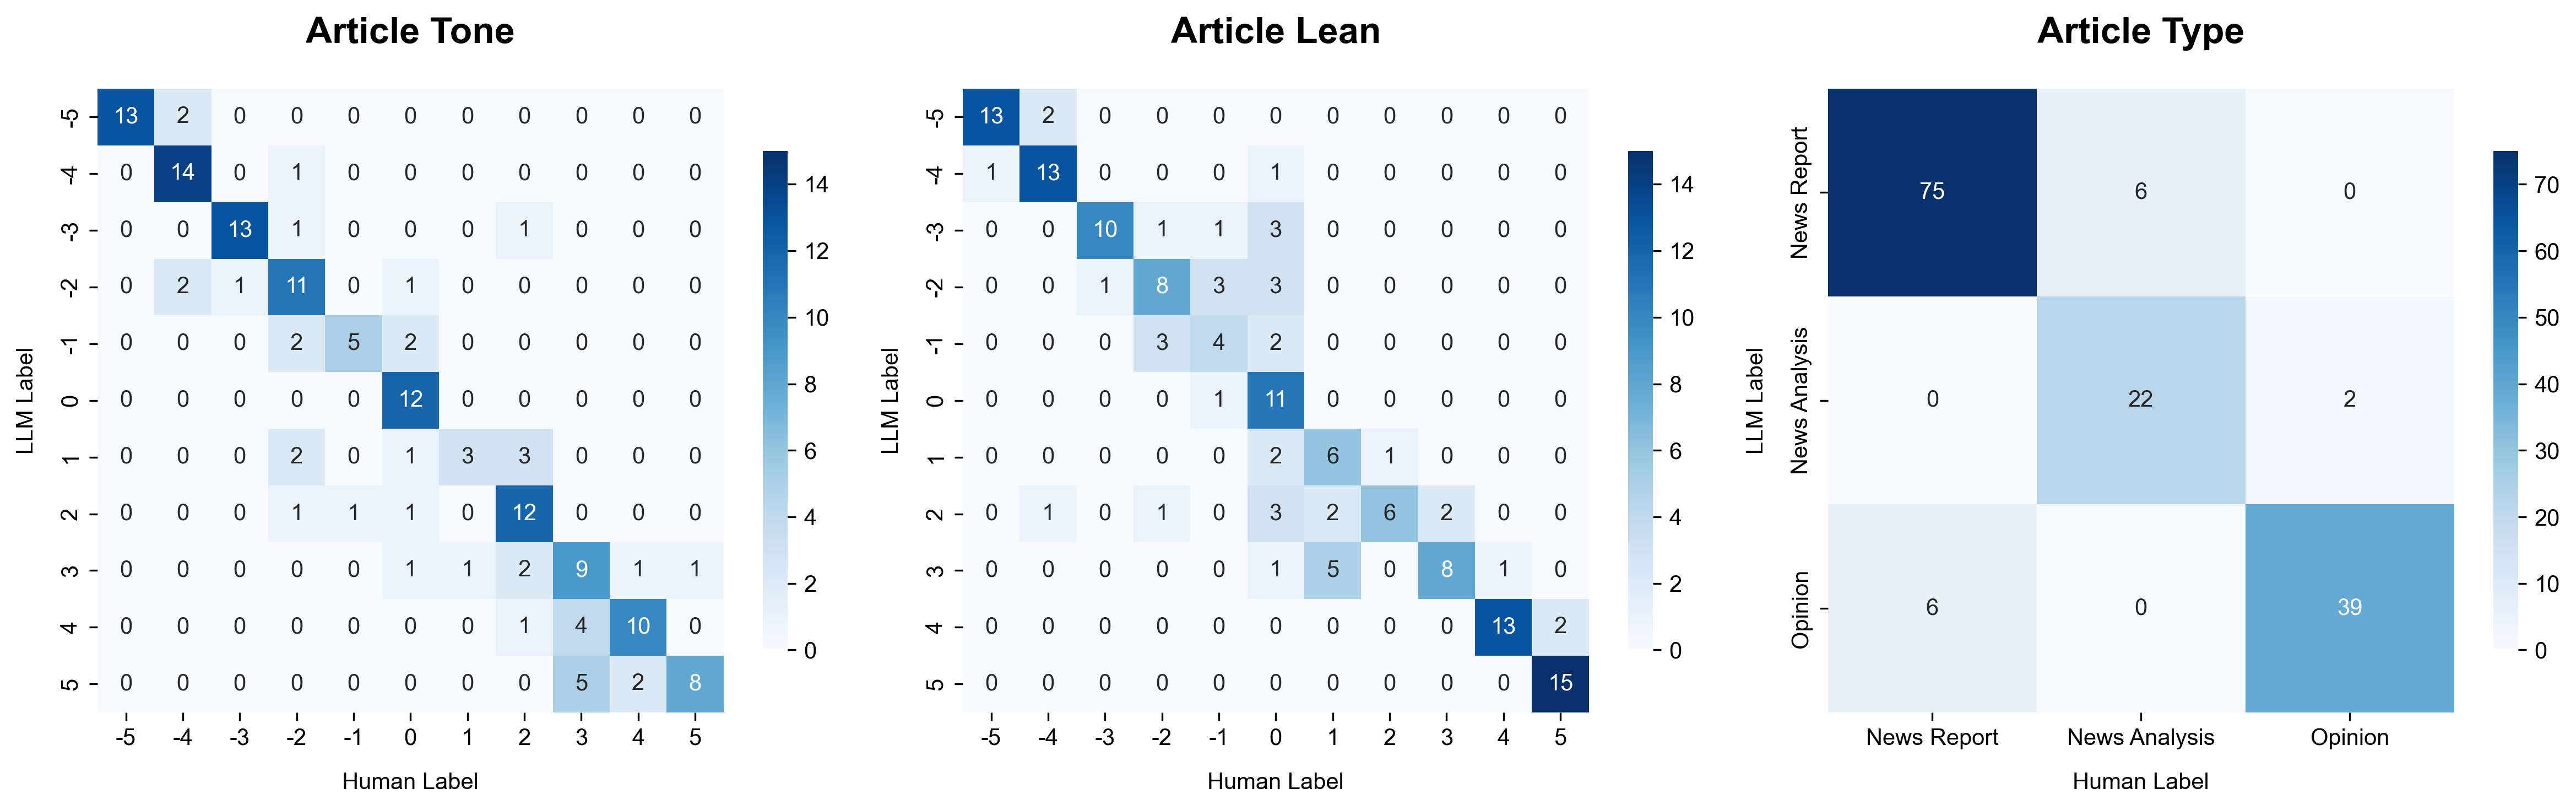

In [15]:
def plot_confusion_matrix(y_true, y_pred, title, ax, vmin=None, vmax=None):
    cm = confusion_matrix(y_true, y_pred, labels=range(-5, 6))
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(-5, 6), yticklabels=range(-5, 6),
                ax=ax, cbar_kws={'shrink': 0.8},
                vmin=vmin, vmax=vmax)
    
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Human Label', fontsize=10, labelpad=10)
    ax.set_ylabel('LLM Label', fontsize=10, labelpad=10)

def plot_news_type_confusion_matrix(y_true, y_pred, title, ax, vmin=None, vmax=None):
    labels = ['News Report', 'News Analysis', 'Opinion']
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels,
                ax=ax, cbar_kws={'shrink': 0.8},
                vmin=vmin, vmax=vmax)
    
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Human Label', fontsize=10, labelpad=10)
    ax.set_ylabel('LLM Label', fontsize=10, labelpad=10)

combined_df = pd.concat([df1, df2, df3], ignore_index=True)
combined_clean = combined_df.dropna(subset=['gpt_article_tone', 'ra_tone', 'gpt_article_lean', 'ra_lean'])

combined_news_type = combined_df.dropna(subset=['human_news_type_choice', 'news_type'])

combined_news_type = combined_news_type.copy()
combined_news_type['news_type'] = combined_news_type['news_type'].str.title()
combined_news_type['human_news_type_choice'] = combined_news_type['human_news_type_choice'].str.title()

cm_tone = confusion_matrix(combined_clean['gpt_article_tone'], combined_clean['ra_tone'], labels=range(-5, 6))
cm_lean = confusion_matrix(combined_clean['gpt_article_lean'], combined_clean['ra_lean'], labels=range(-5, 6))
cm_news_type = confusion_matrix(
    combined_news_type['news_type'],
    combined_news_type['human_news_type_choice'],
    labels=['News Report', 'News Analysis', 'Opinion']
)

vmin_tone_lean = min(cm_tone.min(), cm_lean.min())
vmax_tone_lean = max(cm_tone.max(), cm_lean.max())

vmin_news_type = cm_news_type.min()
vmax_news_type = cm_news_type.max()

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

plot_news_type_confusion_matrix(
    combined_news_type['news_type'],
    combined_news_type['human_news_type_choice'],
    'Article Type', axes[2], vmin=vmin_news_type, vmax=vmax_news_type
)

plot_confusion_matrix(combined_clean['gpt_article_tone'], combined_clean['ra_tone'], 
                     'Article Tone', axes[0], vmin=vmin_tone_lean, vmax=vmax_tone_lean)

plot_confusion_matrix(combined_clean['gpt_article_lean'], combined_clean['ra_lean'], 
                     'Article Lean', axes[1], vmin=vmin_tone_lean, vmax=vmax_tone_lean)

plt.tight_layout()
# save pdf
plt.savefig('../plots/type_tone_lean_confusion_matrix.pdf', bbox_inches='tight')

plt.show()


# Sentence Type, Tone, Focus

In [8]:
sent1 = pd.read_csv('../annotations/sentences/sentence_annotation_output_1.csv')
sent2 = pd.read_csv('../annotations/sentences/sentence_annotation_output_2.csv')
sent3 = pd.read_csv('../annotations/sentences/sentence_annotation_output_3.csv')

In [9]:
def compute_agreement(df, gpt_col, human_col):
    clean_df = df.dropna(subset=[gpt_col, human_col])
    if len(clean_df) == 0:
        return np.nan  
    return (clean_df[gpt_col] == clean_df[human_col]).mean()

tone_agreements = []
type_agreements = []
focus_agreements = []

sent_dfs = [sent1, sent2, sent3]

for df in sent_dfs:
    tone_agreements.append(compute_agreement(df, 'gpt_tone', 'tone'))
    type_agreements.append(compute_agreement(df, 'gpt_type', 'type'))
    focus_agreements.append(compute_agreement(df, 'gpt_focus', 'focus'))

tone_arr = np.array(tone_agreements)
type_arr = np.array(type_agreements)
focus_arr = np.array(focus_agreements)

agreement_stats = pd.DataFrame({
    'metric': ['Sentence Tone', 'Sentence Type', 'Sentence Focus'],
    'mean': [tone_arr.mean(), type_arr.mean(), focus_arr.mean()],
    'std': [tone_arr.std(), type_arr.std(), focus_arr.std()]
})

print(agreement_stats.round(3))

           metric   mean    std
0   Sentence Tone  0.969  0.023
1   Sentence Type  0.885  0.050
2  Sentence Focus  0.903  0.028


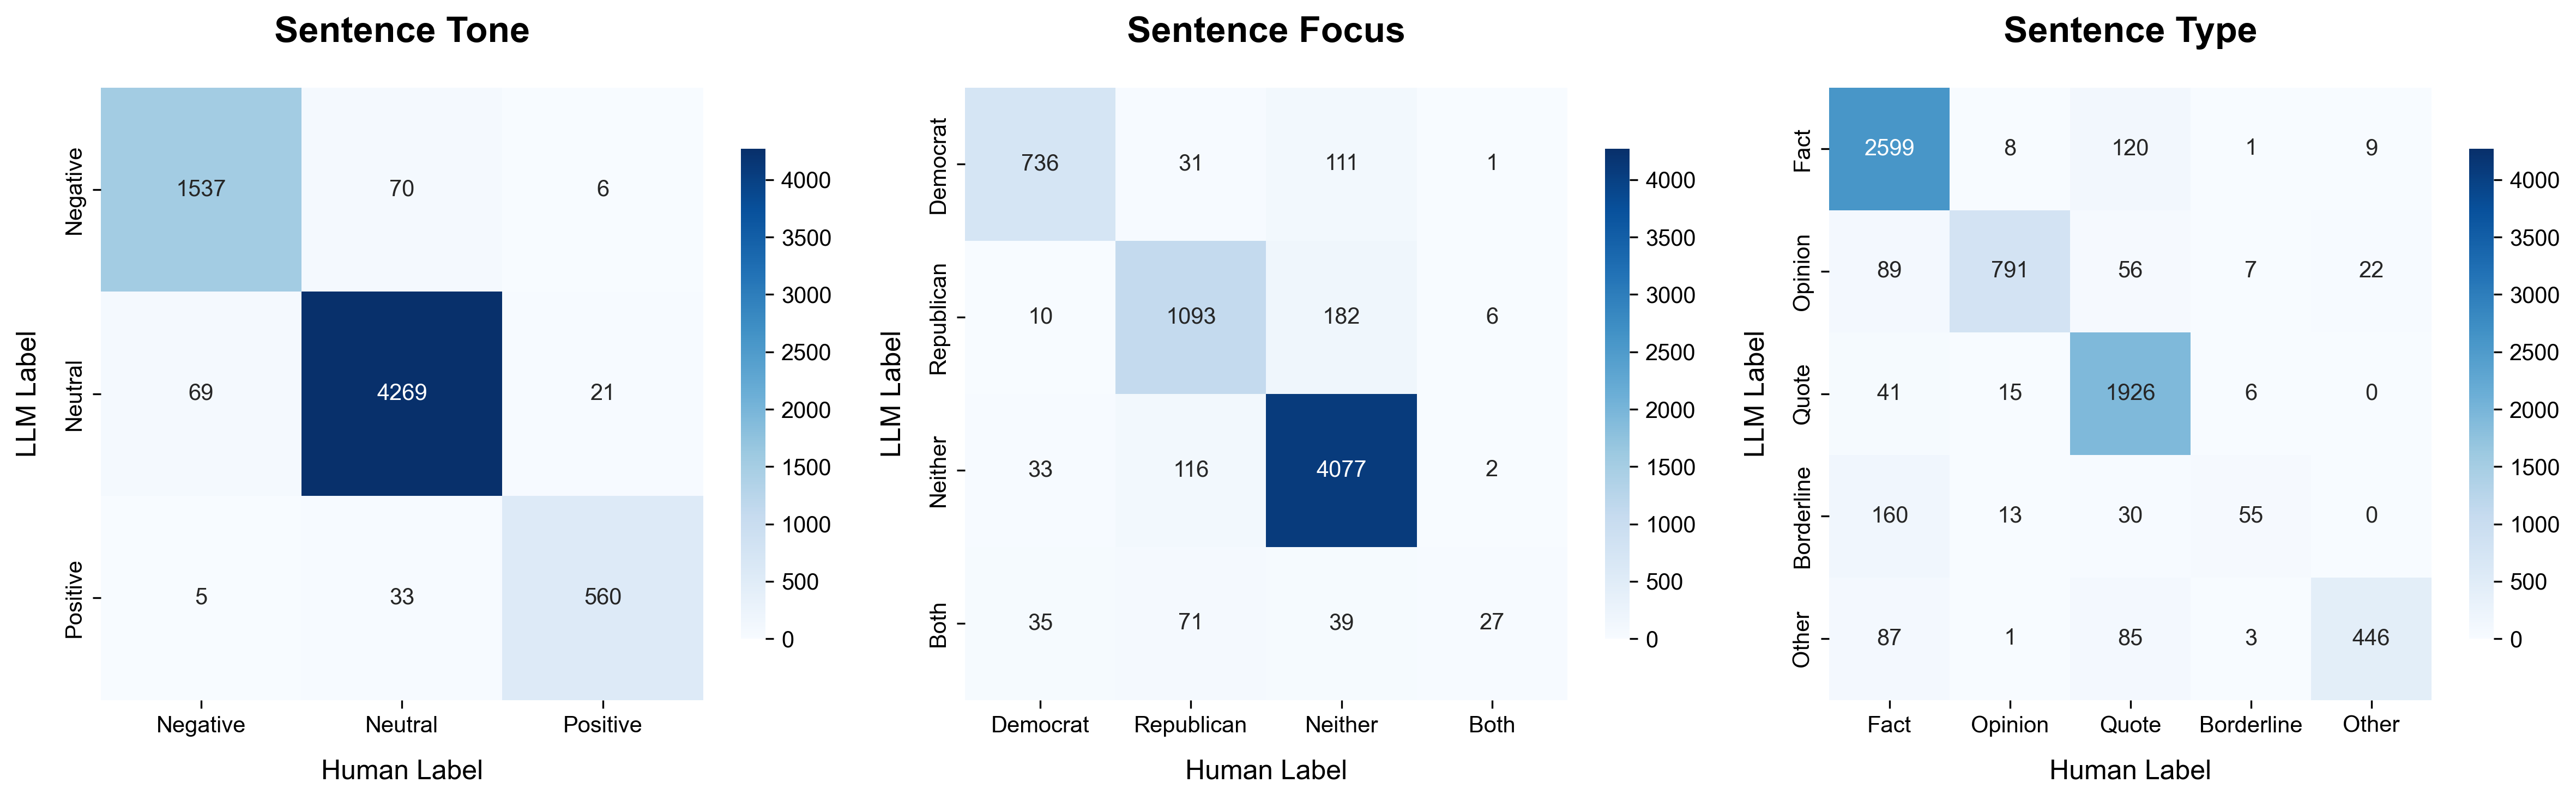

In [10]:
def plot_confusion_matrix_generic(y_true, y_pred, title, ax, labels=None, vmin=None, vmax=None):
    if labels is None:
        labels = sorted(list(set(y_true) | set(y_pred)))
    
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    display_labels = [str(label).capitalize() for label in labels]
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=display_labels, yticklabels=display_labels,
                ax=ax, cbar_kws={'shrink': 0.8},
                vmin=vmin, vmax=vmax)
    
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Human Label', fontsize=12, labelpad=10)
    ax.set_ylabel('LLM Label', fontsize=12, labelpad=10)
    
    if any(len(str(label)) > 10 for label in labels):
        ax.tick_params(axis='x', rotation=45)

combined_sentences = pd.concat([sent1, sent2, sent3], ignore_index=True)

tone_clean = combined_sentences.dropna(subset=['gpt_tone', 'tone'])
type_clean = combined_sentences.dropna(subset=['gpt_type', 'type'])
focus_clean = combined_sentences.dropna(subset=['gpt_focus', 'focus'])

tone_labels = ['negative', 'neutral', 'positive']
type_labels = ['fact', 'opinion', 'quote', 'borderline', 'other']
focus_labels = ['democrat', 'republican', 'neither', 'both']

cm_tone = confusion_matrix(tone_clean['tone'], tone_clean['gpt_tone'], labels=tone_labels)
cm_type = confusion_matrix(type_clean['type'], type_clean['gpt_type'], labels=type_labels)
cm_focus = confusion_matrix(focus_clean['focus'], focus_clean['gpt_focus'], labels=focus_labels)

vmin = min(cm_tone.min(), cm_type.min(), cm_focus.min())
vmax = max(cm_tone.max(), cm_type.max(), cm_focus.max())

fig, axes = plt.subplots(1, 3, figsize=(16, 5))


plot_confusion_matrix_generic(tone_clean['tone'], tone_clean['gpt_tone'], 
                            'Sentence Tone', axes[0], tone_labels, vmin=vmin, vmax=vmax)
plot_confusion_matrix_generic(type_clean['type'], type_clean['gpt_type'], 
                            'Sentence Type', axes[2], type_labels, vmin=vmin, vmax=vmax)
plot_confusion_matrix_generic(focus_clean['focus'], focus_clean['gpt_focus'], 
                            'Sentence Focus', axes[1], focus_labels, vmin=vmin, vmax=vmax)

plt.tight_layout()
plt.savefig('../plots/sentence_confusion_matrix.pdf', bbox_inches='tight')

plt.show()


# Events

In [11]:
event1 = pd.read_csv('../annotations/events/event_annotation_output_1.csv', encoding='ISO-8859-1')
event2 = pd.read_csv('../annotations/events/event_annotation_output_2.csv', encoding='ISO-8859-1')
event3 = pd.read_csv('../annotations/events/event_annotation_output_3.csv', encoding='ISO-8859-1')

In [12]:
def calculate_clustering_metrics(df):
    data = df.copy()
    
    data['theme_clean'] = data['theme'].replace('Fewer than 3 articles', 'None')
    data['human_choice_clean'] = data['human_choice'].replace('None of the above', 'None')
    
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
        data['human_choice_clean'], 
        data['theme_clean'], 
        average='macro',
        zero_division=0
    )
    
    return {
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1,
        'total_articles': len(data)
    }

event1_metrics = calculate_clustering_metrics(event1)
event2_metrics = calculate_clustering_metrics(event2)
event3_metrics = calculate_clustering_metrics(event3)

precisions = [event1_metrics['macro_precision'], event2_metrics['macro_precision'], event3_metrics['macro_precision']]
recalls = [event1_metrics['macro_recall'], event2_metrics['macro_recall'], event3_metrics['macro_recall']]
f1s = [event1_metrics['macro_f1'], event2_metrics['macro_f1'], event3_metrics['macro_f1']]

precision_mean = np.mean(precisions)
precision_std = np.std(precisions, ddof=1)
recall_mean = np.mean(recalls)
recall_std = np.std(recalls, ddof=1)
f1_mean = np.mean(f1s)
f1_std = np.std(f1s, ddof=1)

results_df = pd.DataFrame({
    'metric': ['precision', 'recall', 'f1'],
    'mean': [precision_mean, recall_mean, f1_mean],
    'std': [precision_std, recall_std, f1_std]
})

print(results_df.round(3))

      metric   mean    std
0  precision  0.981  0.021
1     recall  0.956  0.028
2         f1  0.966  0.024
